In [19]:
import pandas
import cPickle as pickle
import datetime
from IPython.display import clear_output

# Imports useful for graphics
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("whitegrid")
seaborn.despine()
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [20]:
filename = 'result.pickle'
with open(filename, 'rb') as fp:
    result = pickle.load(fp)

# Input data
datetimes = [datetime.datetime(2016, 8, 25, i, 0, 0) for i in range(0, 24)]

In [21]:
def lowest_voltage(result, category):
    return result[result[category] != 0].sort_values(category, ascending=True).head(1)[category].values[0]

def highest_voltage(result, category):
    return result.sort_values(category, ascending=False).head(1)[category].values[0]

def highest_overload(result, category):
    return result.sort_values(category, ascending=False).head(1)[category].values[0]

def highest_unbalanced(result, category):
    return result.sort_values(category, ascending=False).head(1)[category].values[0]

In [22]:
# Result holder for different categories
post_result = pandas.DataFrame(index=datetimes, columns=['high_voltage_A', 'high_voltage_B', 'high_voltage_C',
                                                          'low_voltage_A', 'low_voltage_B', 'low_voltage_C',
                                                          'overload_A', 'overload_B', 'overload_C', 'unbalanced'])

for index, date in enumerate(datetimes):
    clear_output()
    print(date)
    # Get highest voltage on the network at each datetime
    post_result.loc[date, 'high_voltage_A'] = highest_voltage(result[index], 'voltage_A')
    post_result.loc[date, 'high_voltage_B'] = highest_voltage(result[index], 'voltage_B')
    post_result.loc[date, 'high_voltage_C'] = highest_voltage(result[index], 'voltage_C')
    
    # Get lowest voltage on the network at each datetime, do not consider 0
    post_result.loc[date, 'low_voltage_A'] = lowest_voltage(result[index], 'voltage_A')
    post_result.loc[date, 'low_voltage_B'] = lowest_voltage(result[index], 'voltage_B')
    post_result.loc[date, 'low_voltage_C'] = lowest_voltage(result[index], 'voltage_C')
    
    # Get highest overload on the network at each datetime
    post_result.loc[date, 'overload_A'] = highest_overload(result[index], 'overload_A')
    post_result.loc[date, 'overload_B'] = highest_overload(result[index], 'overload_B')
    post_result.loc[date, 'overload_C'] = highest_overload(result[index], 'overload_C')
    
    # Get the unbalance
    post_result.loc[date, 'unbalanced'] = highest_overload(result[index], 'diff_with_mean')

2016-08-25 23:00:00


In [23]:
post_result.head(2)

,high_voltage_A,high_voltage_B,high_voltage_C,low_voltage_A,low_voltage_B,low_voltage_C,overload_A,overload_B,overload_C,unbalanced
2016-08-25 00:00:00,1,1,1,0.952,0.966,0.966,48.27,47.46,48,1.4359
2016-08-25 01:00:00,1,1,1,0.952,0.966,0.966,48.27,47.46,48,1.4359


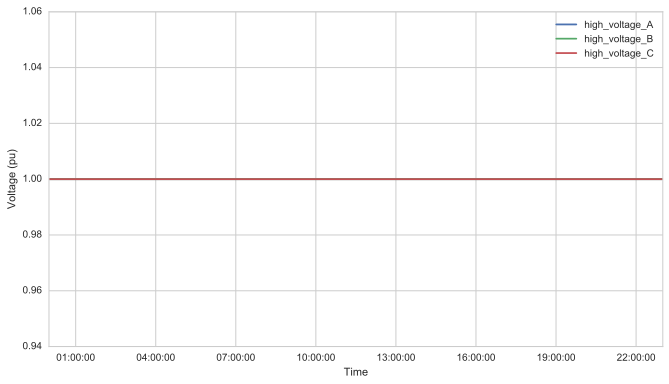

In [24]:
# Plot the maximum voltage per phase
plt.figure(figsize=(11, 6), dpi=60)
plt.plot(post_result.high_voltage_A)
plt.plot(post_result.high_voltage_B)
plt.plot(post_result.high_voltage_C)
plt.legend(loc=0)
plt.ylabel('Voltage (pu)')
plt.xlabel('Time')
plt.show()

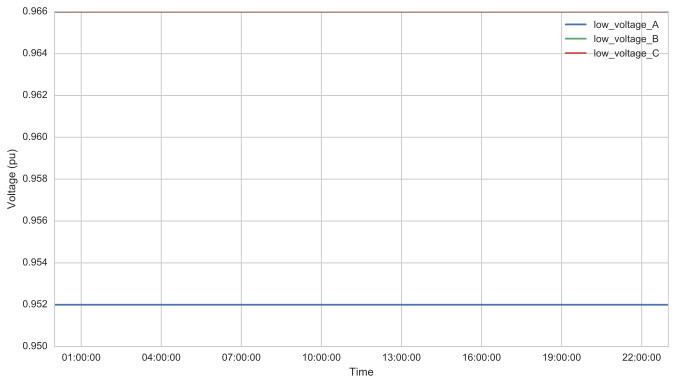

In [25]:
# Plot the minimum voltage per phase
plt.figure(figsize=(11, 6), dpi=60)
plt.plot(post_result.low_voltage_A)
plt.plot(post_result.low_voltage_B)
plt.plot(post_result.low_voltage_C)
plt.legend(loc=0)
plt.ylabel('Voltage (pu)')
plt.xlabel('Time')
plt.show()

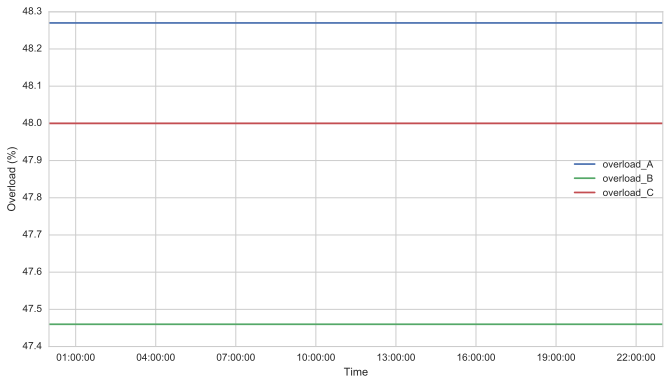

In [26]:
# Plot the overload per phase
plt.figure(figsize=(11, 6), dpi=60)
plt.plot(post_result.overload_A)
plt.plot(post_result.overload_B)
plt.plot(post_result.overload_C)
plt.legend(loc=0)
plt.ylabel('Overload (%)')
plt.xlabel('Time')
plt.show()

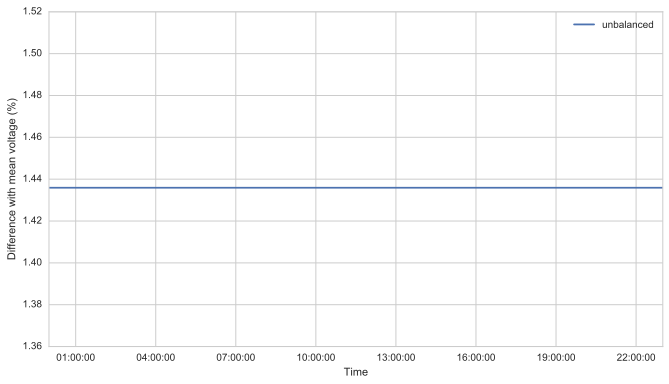

In [27]:
# Plot the minimum voltage per phase
plt.figure(figsize=(11, 6), dpi=60)
plt.plot(post_result.unbalanced)
plt.legend(loc=0)
plt.ylabel('Difference with mean voltage (%)')
plt.xlabel('Time')
plt.show()

# Distance wise plot

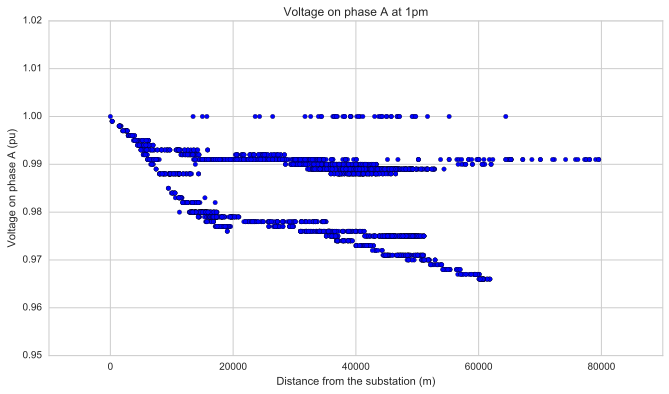

In [39]:
index = 14
plt.figure(figsize=(11, 6), dpi=60)
plt.scatter(result[index][result[index].voltage_B != 0].distance, result[index][result[index].voltage_B != 0].voltage_B)
plt.title('Voltage on phase A at 1pm')
plt.ylabel('Voltage on phase A (pu)')
plt.xlabel('Distance from the substation (m)')
plt.show()

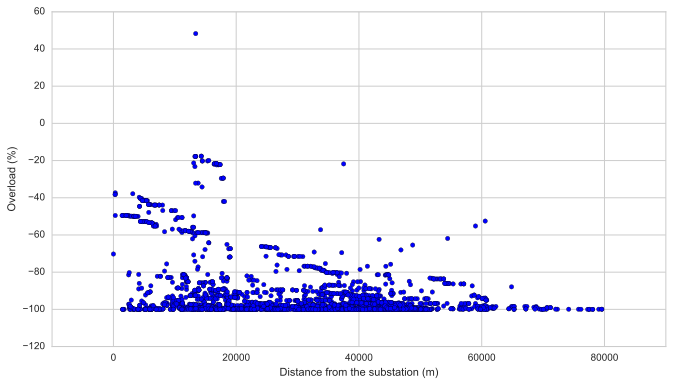

In [29]:
index = 0
plt.figure(figsize=(11, 6), dpi=60)
plt.scatter(result[index].distance, result[index].overload_A)
plt.ylabel('Overload (%)')
plt.xlabel('Distance from the substation (m)')
plt.show()

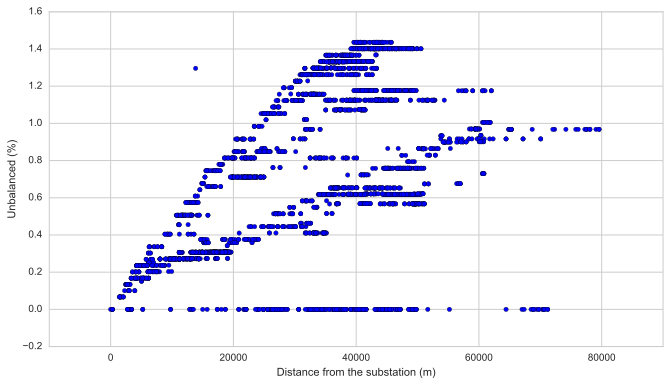

In [30]:
index = 0
plt.figure(figsize=(11, 6), dpi=60)
plt.scatter(result[index].distance, result[index].diff_with_mean)
plt.ylabel('Unbalanced (%)')
plt.xlabel('Distance from the substation (m)')
plt.show()